## Blackjack Game by Leonardo

In [1]:
from art import tprint
import random
import ipyplot
import cv2
import glob
import numpy as np
import time

## Global variable declarations:

In [2]:
game_break = False
round_number = 1

player_wins = 0
cpu_wins = 0
ties = 0

round_break = False
turn_number = 1
draw_or_stop = "DRAW"

cards = []
player_cards = []
cpu_cards = []

player_scores = []
cpu_scores = []

player_total_score = 0
cpu_total_score = 0

player_money = 0
cpu_money = 0
bet = 0

Deck will be defined here as a single deck of cards and related to their face value in BlackJack. For that matter, it's datatype will be a dictionary in Python.
Cards will be defined per consequence as the mix of cards played in the game. Therefore, it could be composed on between 1 to 8 decks. A list datatype suffises for my intentions with the game.

In [3]:
deck = {}
# The deck will be composed by a dictionary, with keys defined as the card name and the values defining
# the points/score for each card

for i in ["♠", "♥", "♦", "♣"]:
    for j in range(2,11):
        deck[str(j)+i] = j

    for k in ["J", "Q", "K"]:
        deck[str(k)+i] = 10

    deck["A"+i] = "choose"

cards = list(deck.keys())

## Functions declarations

In [4]:
def welcome_screen():
    """
    Function with the purpose of greeting the player and inviting him to play
    
    Output: a graphic visual with the game's name
    """
    
    tprint("BLACK",font="block")
    tprint("JACK",font="block")
    
    print()
    print('{:^110}'.format('ARE YOU READY FOR A CHICKEN DINNER ?'))
    print()
    print("-"*110)
    print("-"*110)
    print("-"*110)
    print()
    
    return None

In [5]:
def show_deck(number_of_decks_used):

    deck_image = []
    files = glob.glob("/Users/oleoaraujo/Documents/Github/data-ft-par-labs/Projects/Week-1/your-project/*.png")
    
    for i in range(number_of_decks_used):
        for myFile in files:
            image = cv2.imread(myFile)
            deck_image.append(image)
    
    if number_of_decks_used == 1:
        ipyplot.plot_images(deck_image, max_images=8, img_width=900)
    if number_of_decks_used > 1:
        ipyplot.plot_images(deck_image, max_images=8, img_width=450)
    
    return None

In [6]:
def number_of_decks():
    
    global number_of_decks_used, cards
    
    number_of_decks_used = input("Choose the number of decks you would like to play with (from 1 to 8): \n")
    
    while number_of_decks_used not in range(1,9):
        try:
            number_of_decks_used = int(number_of_decks_used)
        except:
            number_of_decks_used = input("Please, try again. You need to choose an integer between 1 and 8 for the number of decks:\n")
        else:
            number_of_decks_used = int(number_of_decks_used)
    
    cards = []
    for i in range(number_of_decks_used):
        cards += list(deck.keys())
    
    print(f"\nNice choice! Your deck has then {len(cards)} CARDS and here are the cards in your full deck:")
    show_deck(number_of_decks_used)
    
    option_quit_game()
    
    return None

In [7]:
def reset_all(deck=deck):
    """
    This function has the objective of reseting:
    1. the deck of cards after every round, since the deck is used with no replacement of cards during each turn of play
    2. all the other variables related to the player and the CPU
    
    Input: deck (as a dictionary)
    Output: cards = multiple times the deck (as a list)"""
    
    global turn_number, round_break, game_break, draw_or_stop, cards, player_cards, player_scores, player_total_score, cpu_cards, cpu_scores, cpu_total_score, number_of_decks_used, bet
    
    turn_number = 1
    round_break = False
    draw_or_stop = "DRAW"
    
    cards = []
    for i in range(number_of_decks_used):
        cards += list(deck.keys())
    
    player_cards = []
    player_scores = []
    player_total_score = 0
    player_money = 0
    
    cpu_cards = []
    cpu_scores = []
    cpu_total_score = 0
    
    bet = 0
    
    return None

In [8]:
def bets():
    """This function has the objective of keeping track of the bets made by the player.
    By default, the CPU will always accept the bet of the player and go agains him.
    It also updates the amount of money in the account of the PLAYER and CPU."""
    
    global player_money, cpu_money, turn_break, round_break, game_break, bet
    
    while player_money == 0 and cpu_money == 0:
        
        cpu_money = player_money = input("How many $ you want to place to your pot ? \n ")
        
        try:
            player_money = int(player_money)
        except:
            print("You should input A NUMBER for the bet. Please, try again.")
            player_money = 0
            cpu_money = 0
        else:
            if int(player_money) != player_money:
                print("You should input an INTEGER number for the bet. Please, try again.")
                player_money = 0
                cpu_money = 0
            else:
                player_money = int(player_money)
                cpu_money = int(player_money)
    
    print(f"\n\nYou have {player_money}$ available for betting.")
    print(f"The CPU has {cpu_money}$ available for betting.\n\n")
    
    if (player_money>0 and cpu_money==0) or (player_money==0 and cpu_money>0):
        turn_break = True
        round_break = True
        game_break = True
        return None
    
    bet = 0
    
    while bet == 0 and player_money>=0 and cpu_money>=0:
        
        bet = input(f"Place your bet for the round {round_number} : \n")
        
        try:
            bet = int(bet)
        except:
            print("You should input A NUMBER for the bet. Please, try again.")
        else:
            if int(bet) != bet:
                print("You should input an INTEGER number for the bet. Please, try again.")
                player_bet = 0
            elif int(bet)> player_money or int(bet)> cpu_money:
                max_bet = min(cpu_money, player_money)
                print(f"You should input a number equal of inferior to {max_bet}. Please, try again.")
                bet = 0
            else:
                bet = int(bet)
        
        print()
        print()
        
    return None

In [9]:
def choice_of_cards(cards=cards):
    """
    Function randomly choosing a card for the PLAYER or the CPU.
    """
    chosen_card = random.choices(cards)
    return chosen_card[0]

In [10]:
def option_quit_game():
    """
    Function to give the player the option to continue the game or to quit it between every new card been handled.
    """
    
    global round_break, game_break
    
    check = input("\nPress Enter to continue... Or Q to quit. ")
    if check.lower() == 'q':
        round_break = True
        game_break = True
    print()
    return None

In [11]:
def card_points(card_chosen, deck=deck):
    """This function determines the punctuation of each card (either draw by the player or the cpu)
    
    Input: card to be evaluated and the deck dictionary
    Output: punctuation of the card
    """
    
    #print(deck[card_chosen])
    
    if deck[card_chosen] in range (0,11):
        return deck[card_chosen]
    
    elif deck[card_chosen] == "choose":
        flag = True
        points = input("Nice ! You got an Ace ! Choose if you want to attribute 1 or 11 points to this card :\n")
        print()
        
        while flag:
            try:
                points = int(points)
            except:
                points=input("Please, try again. You need to choose 1 or 11 points to this card :\n")
            else:
                if int(points) == 1 or int(points) == 11:
                    flag = False
                    break
                else:
                    points=input("Please, try again. You need to choose 1 or 11 points to this card :\n")
        return int(points)
    
    else:
        print("There's a problem with the ponctuation of cards.\n")
        return 0

In [12]:
def player_choice():
    """This function requires a decision-making from the player: if he wants to keep drawing cards or if he wants to stop
    drawing cards."""
    
    global draw_or_stop
    
    if draw_or_stop.lower() in ["s", "stop"]:
        return "s"
    else:
        draw_or_stop = input("Press 'S' to STOP drawing cards. Any other key to continue drawing cards: ")
        
        draw_or_stop = draw_or_stop.lower()
        
        return draw_or_stop

In [13]:
def show_cards(cards):
    
    cards_images = []
    files = glob.glob("/Users/oleoaraujo/Documents/Github/data-ft-par-labs/Projects/Week-1/your-project/cards-jpg/*.jpg")

    for card in cards:
        for myFile in files:
            if myFile == "/Users/oleoaraujo/Documents/Github/data-ft-par-labs/Projects/Week-1/your-project/cards-jpg/"+card+".jpg":
                image = cv2.imread(myFile)
                cards_images.append(image)
    
    ipyplot.plot_images(cards_images, max_images=20, img_width=100)
    
    return None

In [14]:
def player_turn(turn_number=turn_number, cards=cards, deck=deck):
    """
    This function defines all the tasks that are executed when a card is to be drawn by the player,
    updating the necessary variables : from player_card, to the new cards (deck) and the player_score.
    """
    
    global player_total_score, player_scores, player_cards, draw_or_stop
    
    print(f"------------------------------------ TURN {turn_number} ------------------------------------")
    
    print("\n**PLAYER TURN:**")
    player_card = None
    
    if turn_number <= 2:
        print(f"For this turn (number {turn_number}) a new card has automatically been drawn to the player by the dealer (CPU).")
        draw_or_stop = "DRAW"
    
    elif turn_number >2:
        draw_or_stop = player_choice()
        
    if draw_or_stop.lower() not in ["s", "stop"]:
        player_card = choice_of_cards(cards)
        print(f"Here's the card : {player_card}.\n")
        
        # Drawing a card from the deck: removing it from the deck and allocating it to the player
        cards = cards.remove(player_card)
        player_cards.append(player_card)
        
        # Showing all the cards that have been drawn up to the PLAYER up until now
        show_cards(player_cards)
        
        # Score updates
        player_scores.append(card_points(player_card))
        player_total_score = sum(score for score in player_scores)
        
        #Image(filename=player_card+'.jpg', width=100)
    
    return None

In [15]:
def cpu_turn(turn_number=turn_number, cards=cards, deck=deck):
    
    global cpu_total_score, cpu_cards, round_break, game_break, draw_or_stop
    
    # Drawing a card from the deck: removing it from the deck and allocating it to the cpu:
    
    if turn_number==1 or draw_or_stop.lower() in ["stop", "s"]:
        cpu_card = choice_of_cards(cards)

        print("\n**CPU TURN:**")
        print("A new card has been drawn to the CPU.")
        print(f"Here's the card : {cpu_card}\n")

        cards = cards.remove(cpu_card)
        cpu_cards.append(cpu_card)

        # Showing all the cards that have been drawn up to the CPU up until now
        show_cards(cpu_cards)

        # Score updates
        cpu_scores.append(card_points(cpu_card))
        cpu_total_score = sum(score for score in cpu_scores)
        
        time.sleep(3)
    
    return None

In [16]:
def print_turn():
    """
    Function that returns the result of a turn
    """
    
    if game_break == True:
        return None
    
    print(f"\n----------------------------------------------")
    print(f"-------------- TURN {turn_number} - RESULTS --------------")
    print(f"----------------------------------------------")
    print("")
    print("The PLAYER cards are:", player_cards)
    print("The PLAYER scores are:", player_scores)
    print("The PLAYER total score is:", player_total_score)
    print("")
    print("The CPU cards are:", cpu_cards)
    print("The CPU scores are:", cpu_scores)
    print("The CPU total score is:", cpu_total_score)
    print("")
    print(f"----------------------------------------------")
    print(f"----------------------------------------------")
    print(f"----------------------------------------------")
    
    return None

In [17]:
def print_round_winner():
    """
    Function that returns the result of a round
    """
    
    global player_wins, cpu_wins, ties, player_money, cpu_money, bet
    
    print("-"*110)
    print("-"*110)
    print("-"*110)
    print()
    
    if player_total_score > cpu_total_score and player_total_score <= 21:
        player_wins += 1
        player_money += bet
        cpu_money -= bet
        print("PLAYER IS THE WINNER OF THIS ROUND!")
        print(f"YOU WON {bet}$")
    
    elif cpu_total_score > 21 and player_total_score <= 21:
        player_wins += 1
        player_money += bet
        cpu_money -= bet
        print("PLAYER IS THE WINNER OF THIS ROUND!")
        print(f"YOU WON {bet}$")
    
    elif cpu_total_score > player_total_score and cpu_total_score <= 21:
        cpu_wins += 1
        cpu_money += bet
        player_money -= bet
        print("CPU IS THE WINNER OF THIS ROUND!")
        print(f"YOU LOST {bet}$")
        
    elif player_total_score > 21 and cpu_total_score <= 21:
        cpu_wins += 1
        cpu_money += bet
        player_money -= bet
        print("CPU IS THE WINNER OF THIS ROUND!")
        print(f"YOU LOST {bet}$")
    
    else:
        ties += 1
        print("IT'S A TIE!")
    
    print()
    print(f"The score of the game after round {round_number} is:\n")
    print(f"PLAYER WINS : {player_wins}       PLAYER POT: {player_money}")
    print(f"CPU WINS: {cpu_wins}              CPU POT: {cpu_money}")
    print(f"TIES : {ties}")
    print()
    
    print("-"*110)
    print("-"*110)
    print("-"*110)
    
    print("\n\n\n BRACE YOURSELF FOR ANOTHER ROUND\n\n\n")
    
    option_quit_game()
    
    return None

In [18]:
def print_final_result():
    """
    Function that prints the winner of a round
    """
    
    print("\n#", "-"*108, "#", sep="")
    print("#", "-"*108, "#", sep="")
    print("#", "-"*108, "#", sep="")
    print("#", "-"*108, "#\n", sep="")
    
    if player_wins > cpu_wins:
        print('{:^110s}'.format("PLAYER is the absolute winner!\n"))
    elif cpu_wins > player_wins:
        print('{:^110s}'.format("CPU is the absolute winner!\n"))
    else:
        print('{:^110s}'.format("There's no winner for this game!\n"))
    
    print("#", "-"*108, "#", sep="")
    print("#", "-"*108, "#", sep="")
    print("#", "-"*108, "#", sep="")
    print("#", "-"*108, "#\n\n", sep="")
    
    return None

In [19]:
def goodbye_window():
    """
    Farewell to the player after he entered "Q" to quit the game.
    
    Output: a graphic visual with a goodbye message
    """
    
    tprint("GOODBYE","rnd-xlarge")
    #tprint("BYE",font="block")
    
    print()
    print('{:^110}'.format('SEE YOU SOON'))
    print()
    print()
    return None

## Main Code Execution


 .----------------.  .----------------.  .----------------.  .----------------.  .----------------.
| .--------------. || .--------------. || .--------------. || .--------------. || .--------------. |
| |   ______     | || |   _____      | || |      __      | || |     ______   | || |  ___  ____   | |
| |  |_   _ \    | || |  |_   _|     | || |     /  \     | || |   .' ___  |  | || | |_  ||_  _|  | |
| |    | |_) |   | || |    | |       | || |    / /\ \    | || |  / .'   \_|  | || |   | |_/ /    | |
| |    |  __'.   | || |    | |   _   | || |   / ____ \   | || |  | |         | || |   |  __'.    | |
| |   _| |__) |  | || |   _| |__/ |  | || | _/ /    \ \_ | || |  \ `.___.'\  | || |  _| |  \ \_  | |
| |  |_______/   | || |  |________|  | || ||____|  |____|| || |   `._____.'  | || | |____||____| | |
| |              | || |              | || |              | || |              | || |              | |
| '--------------' || '--------------' || '--------------' || '--------------' || '--------


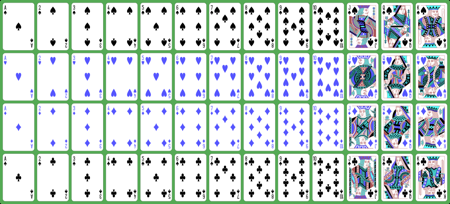
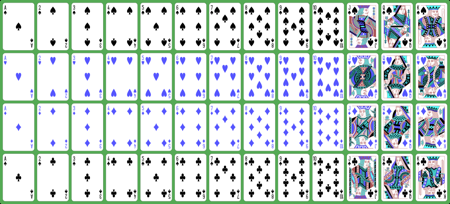


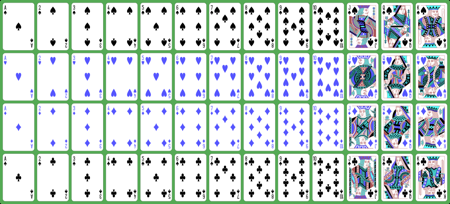
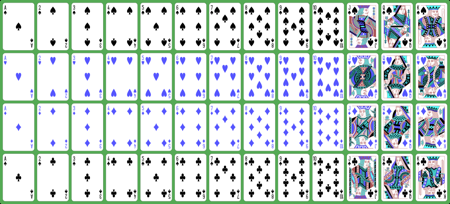


Press Enter to continue... Or Q to quit. 

How many $ you want to place to your pot ? 
 4


You have 4$ available for betting.
The CPU has 4$ available for betting.


Place your bet for the round 1 : 
2


------------------------------------ TURN 1 ------------------------------------

**PLAYER TURN:**
For this turn (number 1) a new card has automatically been drawn to the player by the dealer (CPU).
Here's the card : Q♦.




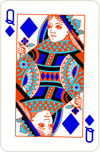


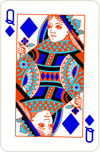


**CPU TURN:**
A new card has been drawn to the CPU.
Here's the card : 9♦




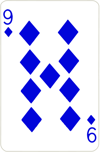


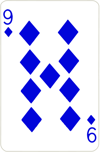


----------------------------------------------
-------------- TURN 1 - RESULTS --------------
----------------------------------------------

The PLAYER cards are: ['Q♦']
The PLAYER scores are: [10]
The PLAYER total score is: 10

The CPU cards are: ['9♦']
The CPU scores are: [9]
The CPU total score is: 9

----------------------------------------------
----------------------------------------------
----------------------------------------------

Press Enter to continue... Or Q to quit. 

------------------------------------ TURN 2 ------------------------------------

**PLAYER TURN:**
For this turn (number 2) a new card has automatically been drawn to the player by the dealer (CPU).
Here's the card : 3♦.




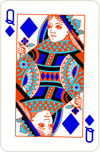
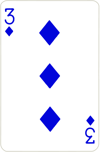


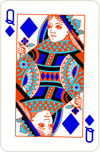
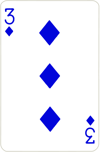


----------------------------------------------
-------------- TURN 2 - RESULTS --------------
----------------------------------------------

The PLAYER cards are: ['Q♦', '3♦']
The PLAYER scores are: [10, 3]
The PLAYER total score is: 13

The CPU cards are: ['9♦']
The CPU scores are: [9]
The CPU total score is: 9

----------------------------------------------
----------------------------------------------
----------------------------------------------

Press Enter to continue... Or Q to quit. 

------------------------------------ TURN 3 ------------------------------------

**PLAYER TURN:**
Press 'S' to STOP drawing cards. Any other key to continue drawing cards: 
Here's the card : 10♠.




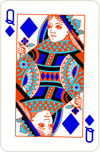
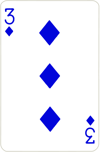
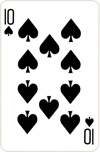


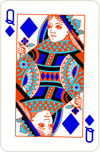
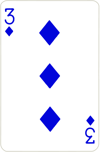
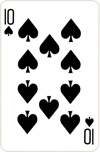


----------------------------------------------
-------------- TURN 3 - RESULTS --------------
----------------------------------------------

The PLAYER cards are: ['Q♦', '3♦', '10♠']
The PLAYER scores are: [10, 3, 10]
The PLAYER total score is: 23

The CPU cards are: ['9♦']
The CPU scores are: [9]
The CPU total score is: 9

----------------------------------------------
----------------------------------------------
----------------------------------------------

Press Enter to continue... Or Q to quit. 

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

CPU IS THE WINNER OF THIS ROUND!
YOU LOST 2$

The score of the game after round 1 is:

PLAYER WINS : 0       PLAYER POT: 2
CPU WINS: 1              CPU P


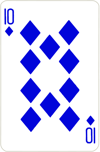


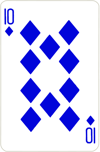


**CPU TURN:**
A new card has been drawn to the CPU.
Here's the card : 7♣




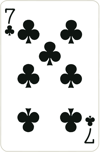


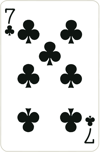


----------------------------------------------
-------------- TURN 1 - RESULTS --------------
----------------------------------------------

The PLAYER cards are: ['10♦']
The PLAYER scores are: [10]
The PLAYER total score is: 10

The CPU cards are: ['7♣']
The CPU scores are: [7]
The CPU total score is: 7

----------------------------------------------
----------------------------------------------
----------------------------------------------

Press Enter to continue... Or Q to quit. 

------------------------------------ TURN 2 ------------------------------------

**PLAYER TURN:**
For this turn (number 2) a new card has automatically been drawn to the player by the dealer (CPU).
Here's the card : 7♠.




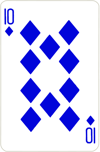
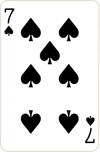


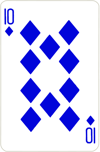
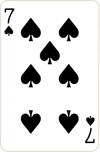


----------------------------------------------
-------------- TURN 2 - RESULTS --------------
----------------------------------------------

The PLAYER cards are: ['10♦', '7♠']
The PLAYER scores are: [10, 7]
The PLAYER total score is: 17

The CPU cards are: ['7♣']
The CPU scores are: [7]
The CPU total score is: 7

----------------------------------------------
----------------------------------------------
----------------------------------------------


KeyboardInterrupt: Interrupted by user

In [20]:
welcome_screen()
number_of_decks()

# Looping each ROUND of play
while game_break == False:
    
    # Reseting the main variables
    reset_all()
    
    bets()
    
    # Looping each TURN of play
    while round_break == False:
        
        player_turn(turn_number)
        time.sleep(3)
        cpu_turn(turn_number)
        
        if player_total_score>21:
            round_break = True
        elif cpu_total_score >16:
            round_break = True
        
        # This should print the result of a turn, if the user has not yet entered Q for quitting the game
        ## It is used here for educational purposes, of verifying if the code works correctly
        ### Ideally, in the game, it shouldn't be used, cause the player should have to count his score (and of his
        ### opponent) just by looking at the images of the cards drawn. 
        if len(cards) > 0 and game_break == False:
            print_turn()
        
        option_quit_game()
        
        turn_number += 1
    
    if len(cards) >0 and game_break == False:
        print_round_winner()
    
    round_number += 1
    
print_final_result()

goodbye_window()